In [109]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [97]:
unemployment_rate =pd.read_csv(r'/Users/brandonhong/Desktop/Data510/final_project/UNRATE.csv')
unemployment_rate.head(3)

,observation_date,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0


In [98]:
unemployment_rate['observation_date'] = pd.to_datetime(unemployment_rate['observation_date'])

In [99]:
nvidia = yf.download('NVDA', period='30y', interval= '1mo', auto_adjust=True)
nvidia = nvidia[(nvidia.index >= '2000-01-01') & (nvidia.index <= '2025-08-01')]
nvidia.head(3)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2000-01-01,0.070796,0.092166,0.066857,0.090256,4941456000
2000-02-01,0.122251,0.130370,0.068289,0.070916,9160848000
2000-03-01,0.161380,0.286527,0.109836,0.122251,17552160000


In [100]:
spy = yf.download('SPY', period='30y', interval = '1mo', auto_adjust=True)
spy= spy[(spy.index >= '2000-01-01') & (spy.index <= '2025-08-01')]
spy.head(3)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2000-01-01,88.175926,93.664710,85.293328,93.664710,156770800
2000-02-01,86.833374,91.334968,83.852055,88.294418,186938300
2000-03-01,95.007256,98.403192,85.313041,86.951778,247594900


In [101]:
unemployment_rate['observation_date'].max()

Timestamp('2025-08-01 00:00:00')

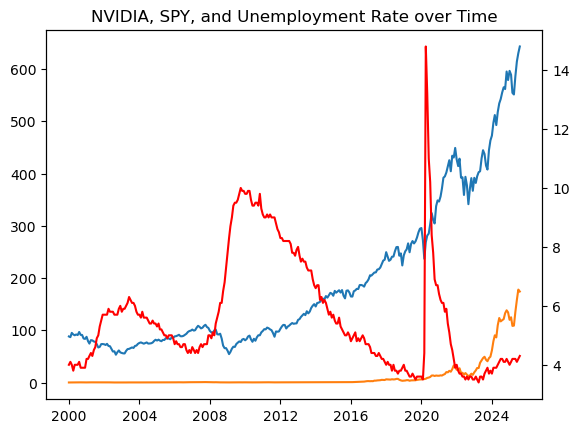

In [102]:
fig, ax1 = plt.subplots()
plt.title('NVIDIA, SPY, and Unemployment Rate over Time')
plt.plot(spy.index, spy['Close'])
plt.plot(nvidia.index, nvidia['Close'])
ax2 = ax1.twinx() 
plt.plot(unemployment_rate['observation_date'], unemployment_rate['UNRATE'], color = 'red')

In [103]:
nvidia.shape

(308, 5)

In [104]:
unemployment_rate.shape

(308, 2)

In [113]:
scaler = MinMaxScaler()

In [114]:
scaled_nvidia_close = scaler.fit_transform(nvidia['Close'])
scaled_unemployment_rate = scaler.fit_transform(pd.DataFrame(unemployment_rate['UNRATE']))

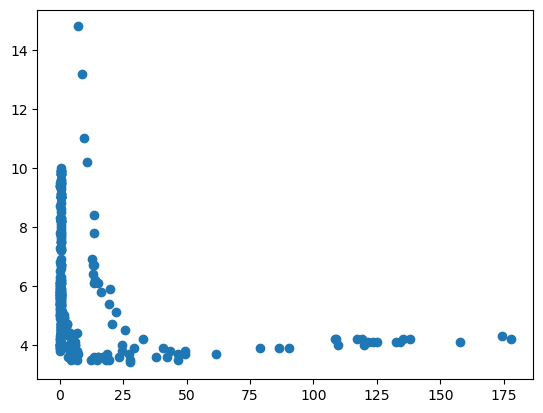

In [115]:
plt.scatter(nvidia['Close'], unemployment_rate['UNRATE'])

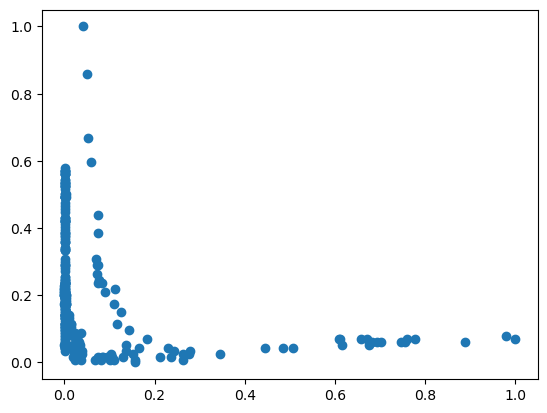

In [116]:
plt.scatter(scaled_nvidia_close, scaled_unemployment_rate)

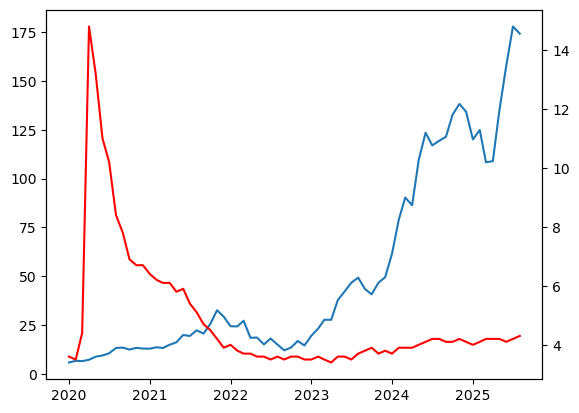

In [125]:
post_ai_boom_nvidia = nvidia[nvidia.index >= '2020-01-01']
post_ai_boom_unemployment = unemployment_rate[unemployment_rate['observation_date']>= '2020-01-01']
fig, ax1 = plt.subplots()
plt.plot(post_ai_boom_nvidia.index, post_ai_boom_nvidia['Close'])
ax2 = ax1.twinx() 
plt.plot(post_ai_boom_unemployment['observation_date'], post_ai_boom_unemployment['UNRATE'], color = 'red')

In [126]:
scaled_post_ai_boom_nvidia_close = scaler.fit_transform(post_ai_boom_nvidia['Close'])
scaled_post_ai_boom_unemployment_rate = scaler.fit_transform(pd.DataFrame(post_ai_boom_unemployment['UNRATE']))

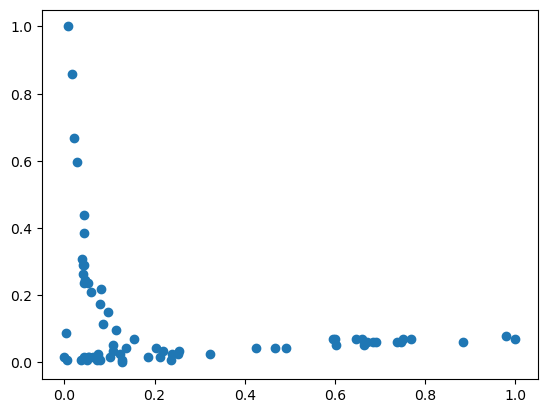

In [127]:
plt.scatter(scaled_post_ai_boom_nvidia_close, scaled_post_ai_boom_unemployment_rate)

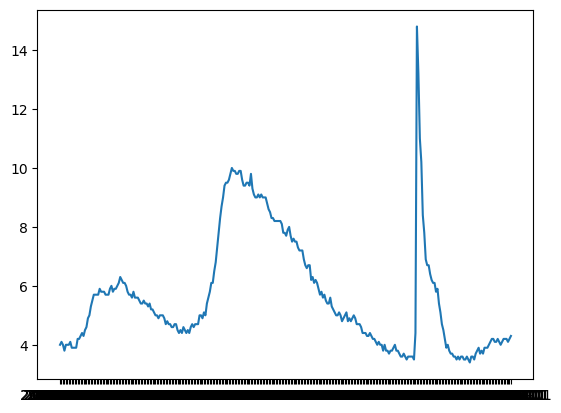

In [42]:
plt.plot(unemployment_rate['observation_date'], unemployment_rate['UNRATE'])

In [43]:
unemployment_rate['UNRATE'].max()

14.8

In [44]:
unemployment_rate[unemployment_rate['UNRATE'] == 14.8]

,observation_date,UNRATE
243,2020-04-01,14.8


In [46]:
spy[spy.index == '2020-04-01']

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2020-04-01,268.541687,272.609374,225.479597,229.251459,2819312300
